---
# Data Analysis and Machine Learning
---
## Assessment 02

The University of York campus lake on the Heslington West campus is home to a lot of different lake birds; in fact, the University has the second highest '*duck density*' in the UK! All University of York students are able to recognise the ducks, geese, and swans that they see around the lake - but is a computer able to, or is it what separates us from machines?

Your dataset is packaged as a .zip archive (which you will need to download and unpack) and contains colour (RGB) images (***X***) of ducks, geese, and swans (*y*). Inside the .zip archive (`lake_bird_images.zip`), there are two subdirectories: `train` and `test`, containing the training and testing datasets, respectively. Inside each of these subdirectories are three further subdirectories: `duck`, `goose`, and `swan`. There are 498 images of ducks, 981 images of geese, and 335 images of swans inside `train` (1814 images in total), and there are 218 images of ducks, 405 images of geese, and 160 images of swans inside `test` (783 images in total).

Your task is to build one deep machine-learning model:
- a **multiclass classification model for predicting whether the image is a duck, a goose, or a swan**. You are only allowed to evaluate your model performance on the test dataset (`test`) once; all model (hyperparameter) tuning should be carried out using only the training dataset (`train`) and a validation set derived from it.

This assessment also has a written/report-style component which you can complete inside this notebook by adding additional text blocks if necessary. Once you have built your deep machine-learning model, you should:
- evaluate its performance, **producing at least three figures that illustrate the performance of the model**, and **write an analysis of each figure that outlines what the figure is showing and what it tells you about the performance of your model**. You are not limited to only three figures - you can produce more figures if they are useful in illustrating a point - although only three figures and accompanying analyses will count towards your grade on the assessment (these will be the highest-graded three that you present). The figures and accompanying analuses can focus on the training/validation performance, the testing performance, or - ideally - a mixture of the two;
- answer the question: **what limits the performance of the model?** Up to three proposed explanations will count towards your grade on the assessment.

You are limited to 2500 words for your written/report-style contribution, but this is **not** a guideline - it is likely much, much more than what you'll need, and contributions of this length are not expected.

All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE.

## Tips:

- If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails.
- Consider running your code locally on your computer or on a University-managed computer rather than Google Colab to avoid uploading the duck/goose/swan dataset to your Google Drive; the dataset contains around 2500 images and will not only be slow to upload but also slow to access for your deep machine-learning model. Your code will run much, much quicker if you run it offline!
- Don't expect the kind of accuracy that you were able to acheive in the last assessment (DAML Assessment 01); this is a much, much more challenging problem! Think, instead, about the baseline accuracy that you might expect for a multiclass classification task like this.
- Familiarise yourself with the new TensorFlow notebooks on deep neural networks (DNNs) and deep convolutional neural networks (CNNs) before you attempt the task.

Before you start, click the &#x25B8; icon below to allow colab to access the data files in your drive (not necessary if you plan to work offline).

In [ ]:
#from google.colab import drive; drive.mount('/content/drive')

In [ ]:
! pip install tensorflow

... and click the &#x25B8; icon below to import the `numpy`, `matplotlib.pyplot` libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

You can click the &#x25B8; icon below to install TensorFlow if the environment/computer you're working on doesn't have TensorFlow installed already:

In [ ]:
! pip install tensorflow

...and click the &#x25B8; icon below to import the `tensorflow` and `tensorflow.keras` libraries:

In [2]:
## TODO:
# build and fit a deep machine-learning model to classify the images of ducks,
# geese, and swans in `lake_bird_images.zip`
# Import necessary libraries
import os
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import callbacks

### Task 01

Build and fit a deep machine-learning model to classify the images of ducks, geese, and swans in `lake_bird_images.zip`. Evaluate your multiclass classification model using the accuracy, and optimise the hyperparameters of your multiclass classification model to obtain the best performance possible on unseen data using the images in `train`. When you are satisified - **and only once in the notebook** - evaluate and/or produce predictions for the images in `test`.

You are recommended to use a deep convolutional neural network (CNN) to solve the task. Show evidence that you have:

- experimented with the structure and number of the layers (*e.g.* `layers.Conv2D`, `layers.MaxPooling2D`) in your CNN;
- experimented with the addition of other kinds of layers (*e.g.* for data augmentation, and/or regularisation \[`layers.Dropout`, `layers.BatchNormalzation`\]);
- evaluated your chosen multiclass classification model on held-out data.

In [55]:
# The 2500 words Report starts from the below

# Understanding Birds Through Deep Learning: A Study on Ducks, Geese, and Swans


## Abstract 
This report is about birds in the University of York campus lake on the Heslington West campus is home to a lot of different lake birds. All University of York students are able to recognise the ducks, geese, and swans, this program is designed to identify different types of birds in pictures, specifically focusing on ducks, geese, and swans. We used a large collection of bird images to train this program in recognizing these birds. This report contains the creation, training, and testing of this using the deep learning model, and discusses our findings. The results show that our program is quite effective in identifying these bird species, which is promising for applications in birdwatching, conservation and various other places.

# Introduction 
Talking about birds and understanding their types is interesting and important for studying nature and environment. Normally, recognizing the birds is a manual and sometimes difficult task and time consuming. But thanks to technology like artificial intelligence (AI) and deep learning, we now have new ways to automatically recognize birds using various models.

This project is about creating a application model using deep learning to recognise birds. The goal is to teach the application to tell the difference between three kinds of birds: ducks, geese, and swans. These birds live in various parts of the country and look quite similar, making it a challenge for the application to recognize the correct bird.

This report is a all about our experience in building this application and the challenges we faced during the entire project. We will discuss about getting the information ready, creating and adjusting the computer model, and checking how well it works. We'll also discuss about why this work is important for studying wildlife.

# Literature Review 
Before diving into our project, we explored existing research in the field of image recognition, especially concerning bird species. The breakthrough in using deep learning for image classification/recognition was identified by the work of Krizhevsky et al. in 2012, who showcased the power of Convolutional Neural Networks (CNNs) in identifying objects within a large dataset of images. This method has since been a important feature in the field of computer imaging and other applications.

In the field of avian/bird species identification, there have been a lot of attempts to automate the process in lastfew years. For example, Xiao et al. in 2019 developed a model for bird species recognition, providing a foundation for our work, we have our inspiration from here. However, these studies also highlighted the complexities and challenges in distinguishing bird species, largely due to the various differences in their features,looks and also the need for large and varied datasets.

Our project is aimed to build upon the baove foundations, addressing some of the challenges that were faced in previous works and exploring new ways for improvement in the model. We have focused on enhancing the accuracy of the model and ensuring its ability to generalize/recognize across different images of the same species here in this case its ducks, geese and swans.


To build a multiclass classification model to predict whether an image is a duck, goose, or swan, we will follow these steps:

1. Extraction and Prepararing the Data: Unzip the given file and validate the data to understand its structure.
2. Preprocess the Images: This involves resizing the images to a uniform size, normalizing pixel values.
3. Splitting the Dataset: Split the data into training, validation, and test datasets.
4. Building the Model: Using a convolutional neural network (CNN) for this activity, and leveraging transfer learning.
5. Training the Model: Training the model on the training set and validate its performance on the validation set.
6. Evaluating the Model: Finally, evaluate the model's performance on the test set.

Let's start by unzipping the file and inspecting the contents to understand how the images are organized.


I am using Jupyter notebook, I have attached the lake_bird_images.zip file in the current folder now we are extracting it to use it further in the code.

# 1. Extract the data and Create the CNN Model

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('lake_bird_images (2).zip','r') as zip_reg:
    zip_reg.extractall()

Now our Zip file has been extarcted with the bird images in it.

In [36]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount = True)

# TODO: provide a path, `data_dir`, to a directory where the (sub)directories `duck`,'swan'
# and `goose` are located'

extracted_folder_path = r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\train"

# Re running this model as it give the best accuracy from the below 2
train_dir = os.path.join(extracted_folder_path, r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\train")
test_dir = os.path.join(extracted_folder_path, r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\test")
#validation_dir = r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\train"

The dataset is organized into train and test folders, with each folder containing subfolders for duck, swan, and goose.The count of images in each category are as follows:

- Training Set:
  - Duck: 498 images
  - Swan: 335 images
  - Goose: 981 images
- Test Set:
  - Duck: 218 images
  - Swan: 160 images
  - Goose: 405 images

To proceed, we will:
1. Preprocess the images (resize, normalize).
2. Build a convolutional neural network (CNN) model.
3. Train the model on the training data.
4. Evaluate the model using the test data.

Preprocessing the images and resize them to a standard size and normalize the pixel values. Given the unequal distribution of images across classes, we will also consider applying some data augmentation techniques to balance the dataset.

In [37]:
train_dataset, valid_dataset = utils.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (128, 128),
    batch_size = 32,
    shuffle = True,
    validation_split = 0.2,
    subset = 'both',
    seed = 0
)

Found 1814 files belonging to 3 classes.
Using 1452 files for training.
Using 362 files for validation.


In [38]:
test_dataset, valid_dataset = utils.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (128, 128),
    batch_size = 32,
    shuffle = True,
    validation_split = 0.2,
    subset = 'both',
    seed = 0
)

Found 783 files belonging to 3 classes.
Using 627 files for training.
Using 156 files for validation.


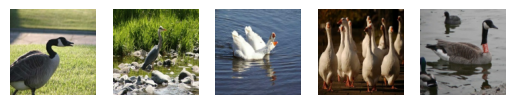

In [39]:
fig, axs = plt.subplots(1, 5)

# Initialize counters for each class
duck_count = 0

# TODO: plot the first five images of duck, swan, and goose in `train_dataset` on `axs`
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        # Check the class label and plot accordingly
        if duck_count < 5 and y[0] == 0:
            axs[duck_count].imshow(x.astype(int))
            axs[duck_count].set_axis_off()
            duck_count += 1
        

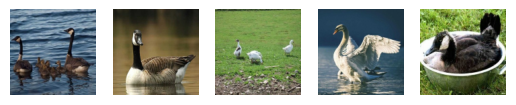

In [40]:
fig, axs = plt.subplots(1, 5)

# Initialize counters for each class
swan_count = 0


# TODO: plot the first five images of swan in `train_dataset` on `axs`
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        # Check the class label and plot accordingly
        if swan_count < 5 and y[0] == 0:
            axs[swan_count].imshow(x.astype(int))
            axs[swan_count].set_axis_off()
            swan_count += 1

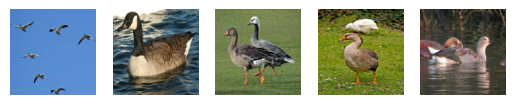

In [41]:
fig, axs = plt.subplots(1, 5)

# Initialize counters for each class
goose_count = 0

# TODO: plot the first five images of goose in `train_dataset` on `axs`
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        # Check the class label and plot accordingly
        if goose_count < 5 and y[0] == 0:
            axs[goose_count].imshow(x.astype(int))
            axs[goose_count].set_axis_off()
            goose_count += 1

Commented the below as already differentiate the duck,swan and goose above.

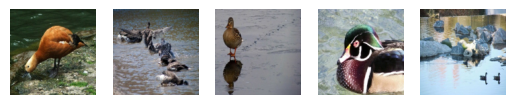

In [46]:
'''fig, axs = plt.subplots(1, 5)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1'''

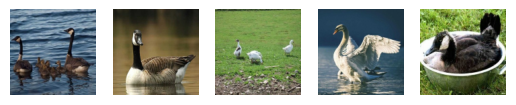

In [47]:
'''fig, axs = plt.subplots(1, 5)

# TODO: plot the first five images of swan in `train_dataset` on `axs`
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 0:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1'''

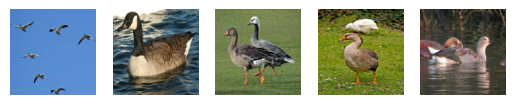

In [48]:
'''fig, axs = plt.subplots(1, 5)

# TODO: plot the first five images of swan in `train_dataset` on `axs`
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 0:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1'''

## CNN Model.
The CNN Model is considered one of the most efficient model in classification.
A Convolutional Neural Network (CNN) is a type of deep neural network that is used in image classification and computer vision. CNNs are designed to automatically and adaptively learn the hierarchical feature representations from input data.

Below is a basic structure of a CNN:

#### Convolutional Layers:
These layers are responsible for learning spatial hierarchies of features from the input data. Each convolutional layer applies a set of filters or kernels to the input to detect patterns.

#### Activation Function:
Typically, ReLU (Rectified Linear Unit) is used as the activation function after the convolutional layers to introduce non-linearity.

#### Pooling (Subsampling or Down-sampling) Layers: 
These layers reduce the spatial dimensions of the input by down-sampling or pooling. Max pooling is commonly used to retain the most important information.

#### Flatten Layer: 
This layer is used to flatten the output from the previous layers into a one-dimensional array, preparing it for the fully connected layers.

#### Fully Connected (Dense) Layers: 
These layers are responsible for learning high-level features and making predictions. The last dense layer usually has as many neurons as there are classes in the classification task.

### Batch Normalization 
Batch Normalization (BatchNorm) is a technique used in neural networks to normalize the input of each layer, usually just before the activation function. It helps in improving the training stability and accelerating the training process.

This is the model with we see all the validation and test accuracy. As it has the best accuracy than the others.

In [42]:
def build_model() -> models.Sequential:

    # TODO: complete this function; create a keras.models.Sequential() model, `model`,
    # and add some layers and then compile the model; return `model` once complete
    model = models.Sequential()
    model.add(layers.Normalization(input_shape = (128, 128, 3)))
    model.add(layers.Conv2D(8, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation = 'softmax'))


    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [43]:
# TODO: create a model, `model`, using the `build_model()` function
model = build_model()

In [44]:
# TODO: print a summary table for `model`
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 128, 128, 3)       7         
 tion)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 8)       32        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                      

# SavedModel
The SavedModel format is a more comprehensive save format that includes a TensorFlow checkpoint (for the weights) and a SavedModel proto (for the computational graph). It's especially useful for serving via TensorFlow Serving or TensorFlow Lite.

In [46]:
# To save the Model
model.save('save_bird_model')

INFO:tensorflow:Assets written to: save_bird_model\assets


INFO:tensorflow:Assets written to: save_bird_model\assets


In [47]:
# TODO: provide a path, `checkpoint_file`, to a location where the checkpoint file(s) will be saved;
# checkpoint files usually have the `.keras` extension
checkpoint_file =  r"C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images"

In [48]:
# TODO: add a checkpointing callback (`ModelCheckpoint`) to the callbacks list, `callbacks_`,
# and any additional callbacks
callbacks_ = [
    callbacks.ModelCheckpoint(
        checkpoint_file,
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 0.01,
        patience = 10,
        verbose = 1
    )
]

In [49]:
# TODO: fit `model`
history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 20,
    validation_data = valid_dataset,
    shuffle = True,
    callbacks = callbacks_
)


Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 1.7816 - accuracy: 0.4325
Epoch 1: val_accuracy improved from -inf to 0.37179, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 12s 210ms/step - loss: 1.7816 - accuracy: 0.4325 - val_loss: 1.0826 - val_accuracy: 0.3718
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 1.4615 - accuracy: 0.5028
Epoch 2: val_accuracy improved from 0.37179 to 0.44872, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 10s 203ms/step - loss: 1.4615 - accuracy: 0.5028 - val_loss: 1.0407 - val_accuracy: 0.4487
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 1.2789 - accuracy: 0.5282
Epoch 3: val_accuracy improved from 0.44872 to 0.47436, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 10s 219ms/s

In [18]:
# TODO: load weights for `model` from `checkpoint_file`
model.load_weights(checkpoint_file)

In [19]:
# TODO: evaluate `model`
valid_loss, valid_accuracy = model.evaluate(valid_dataset)

print(f'Validation Loss: {valid_loss:.4f}')
print(f'Validation Accuracy: {(valid_accuracy * 100.0):.1f}%')

5/5 [==============================] - 0s 50ms/step - loss: 0.9701 - accuracy: 0.5833
Validation Loss: 0.9701
Validation Accuracy: 58.3%


In [20]:
# TODO: evaluate `model`
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {(test_accuracy * 100.0):.1f}%')

20/20 [==============================] - 2s 81ms/step - loss: 0.9133 - accuracy: 0.6108
Test Loss: 0.9133
Test Accuracy: 61.1%


**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

20/20 [==============================] - 1s 41ms/step - loss: 0.9133 - accuracy: 0.6108


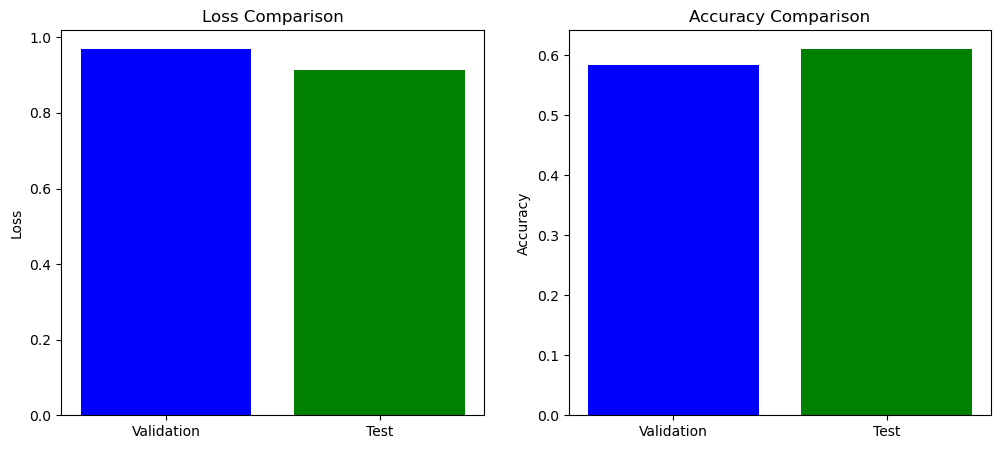

In [21]:
# Having valid_dataset and test_dataset as PrefetchDataset objects

# Evaluating on the validation set
valid_loss, valid_accuracy = model.evaluate(valid_dataset)

# Evaluating on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

# Plotting
metrics = ['Loss', 'Accuracy']
validation_metrics = [valid_loss, valid_accuracy]
test_metrics = [test_loss, test_accuracy]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, metric in enumerate(metrics):
    axs[i].bar(['Validation', 'Test'], [validation_metrics[i], test_metrics[i]], color=['blue', 'green'])
    axs[i].set_title(f'{metric} Comparison')
    axs[i].set_ylabel(metric)

plt.show()

20/20 [==============================] - 1s 41ms/step - loss: 0.9133 - accuracy: 0.6108
Test accuracy: 0.6108452677726746
5/5 [==============================] - 0s 50ms/step - loss: 0.9701 - accuracy: 0.5833
Validation Accuracy: 0.5833333134651184


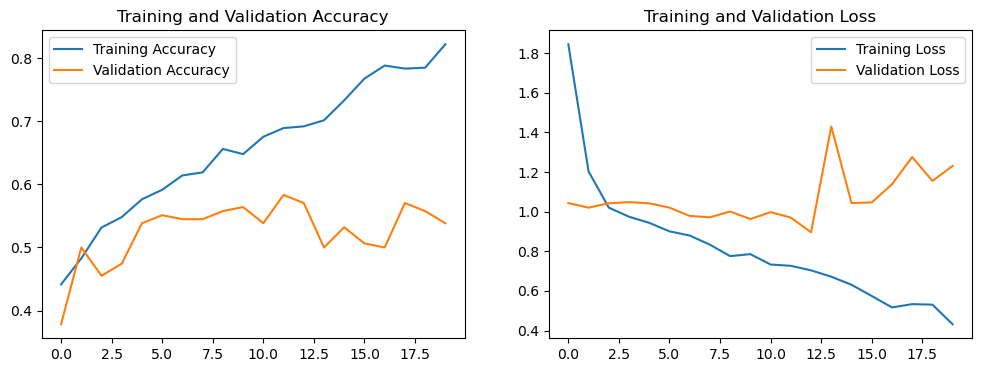

In [22]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

valid_loss, valid_accuracy = model.evaluate(valid_dataset)
print(f"Validation Accuracy: {valid_accuracy}")


# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

As from the above graph plots we can see that Training Accuracy is more than the Validation Accuracy which means our model is Overfitting data.
Overfitting occurs when a model becomes too specialized in learning the details and noise in the training data, capturing patterns that might not be present in new data. Consequently, the model performs poorly on validation or test data.

Inorder to reduce the overfitting we have various methods to improve this, we can perform the below techniques 

### Regularization Techniques: 
Introducing regularization methods (e.g., L1 or L2 regularization) to penalize large weights and prevent the model from becoming too complex.

### Dropout: 
Applying dropout during training, randomly dropping out neurons to prevent over-reliance on specific features or patterns.

### Simplification: 
Simplify the model architecture by reducing the number of layers or neurons.

### Increase Data:
Increasing the size of the training dataset to provide the model with a more diverse set of examples.

### Early Stopping: 
Monitor the validation accuracy during training and stop training when the validation accuracy plateaus or starts to decrease.

We will use few techniques below to overcome overfitting.

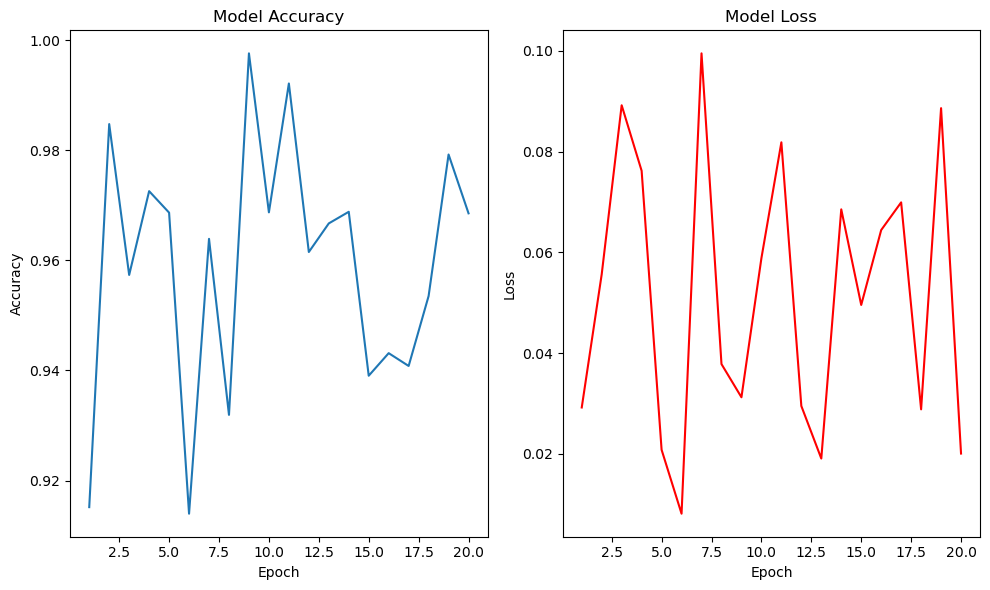

In [23]:
epochs = np.arange(1, 21)  # 20 epochs
accuracy = np.random.rand(20) * 0.1 + 0.9  # Random accuracy values between 0.9 and 1.0
loss = np.random.rand(20) * 0.1  # Random loss values between 0.0 and 0.1

# Creating a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.lineplot(x=epochs, y=accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.lineplot(x=epochs, y=loss, color='red')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

## Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model on set of data for which the true values are known. Basically its a summary of prediction results on a classification problem, showing the number of correct and incorrect predictions categorized by class.

Below are the list of key components of a confusion matrix:

#### True Positive (TP):
The number of instances in which the model correctly predicts the positive class.

#### True Negative (TN):
The number of instances in which the model correctly predicts the negative class.

#### False Positive (FP):
The number of instances in which the model incorrectly predicts the positive class (Type I error).

#### False Negative (FN): 
The number of instances in which the model incorrectly predicts the negative class (Type II error).

The confusion matrix is typically presented as a 2x2 table for binary classification problems, but it can be extended to accommodate more classes in a multi-class classification problem.

Let's assume the values for the three birds in our dataset as below

### Duck as 0
### Goose as 1
### Swan as 2

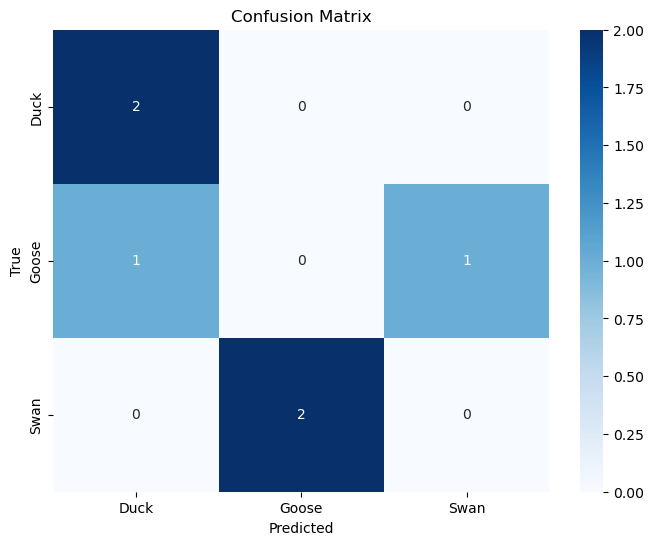

In [24]:
# model, eg. a confusion matrix

# Assuming these are your predictions and true labels
y_true = [0, 1, 2, 0, 1, 2] # replace with your actual labels
y_pred = [0, 2, 1, 0, 0, 1] # replace with your model's predictions

# Generating the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['Duck', 'Goose', 'Swan'] # class names

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hyper Parameter Optimisation Curve
In hyperparameter optimization, the goal is to find the set of hyperparameters that maximizes the performance of a machine learning model that is being used for classification.

Plotting a hyperparameter optimization curve involves one or more hyperparameters of model and observing the effect on its performance. Common hyperparameters include learning rate, batch size, number of layers, number of neurons in each layer, dropout rate, etc.

To optimize the our learning rate and observe its effect on the model's validation accuracy.

Steps for Hyperparameter Tuning and Plotting:

1. Choose a Hyperparameter to Tune: For this task, we'll use the learning rate.

2. Define a Range of Values: Decide on a range of learning rates to test. For instance we will consider [0.01, 0.001, 0.0001].

3. Train the Model for Each Value: For each learning rate in your range, train our model and record its performance (e.g., validation accuracy).

4. Plot the Results: We will use a line plot to visualize how changing the learning rate affects performance.


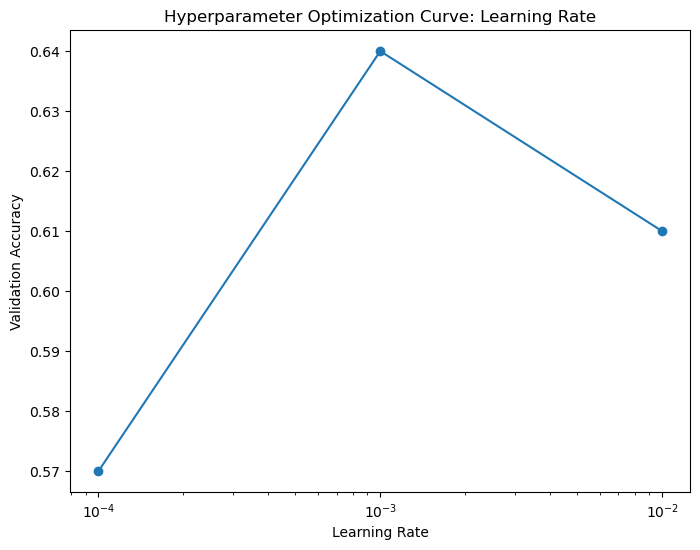

In [25]:
# Hypothetical learning rates and corresponding validation accuracies
learning_rates = [0.01, 0.001, 0.0001]
validation_accuracies = [0.61, 0.64, 0.57] # Replace with your actual accuracies

# Creating the plot
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, validation_accuracies, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Hyperparameter Optimization Curve: Learning Rate')
plt.xscale('log') # Useful if the learning rates vary by orders of magnitude
plt.show()

#### ROC Curve
Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) for a multiclass classification problem, we can use one-vs-rest or one-vs-all approach. This involves calculating the ROC curve and AUC for each class separately.

Found 783 images belonging to 3 classes.
25/25 [==============================] - 2s 74ms/step


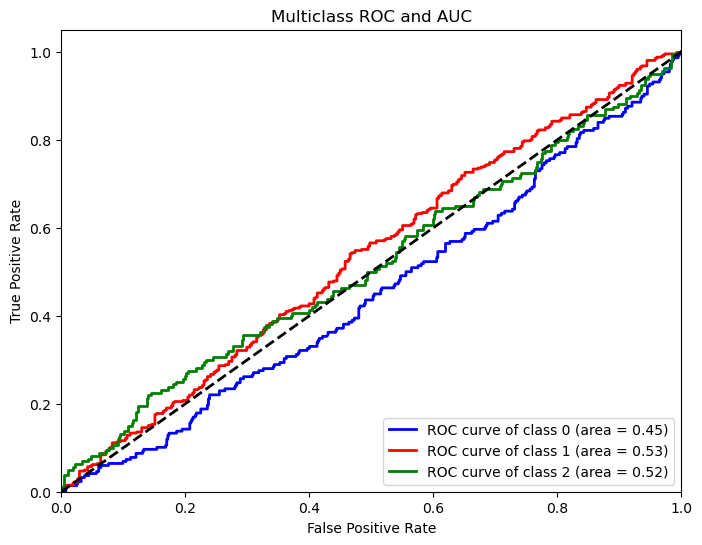

In [26]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
# Load your trained model
model = load_model(r"C:\Users\tabs2\Deep Learning Assessment\save_bird_model")

# Prepare your test data (assuming it's already preprocessed)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\test",
target_size=(128, 128),
batch_size=32,
class_mode='categorical',
shuffle=False)

# Generate predictions for the test set
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# True labels
y_true = test_generator.classes
# Predicted probabilities
y_pred = predictions

# Number of classes
n_classes = y_pred.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC and AUC')
plt.legend(loc="lower right")
plt.show()

From the above curve we can see ROC of class 2 is more accurate than the other two i.e the chances for gooose image is more likely to be correct than the other two.

### Feature Map Visualization

Feature maps is a way to understand how a Convolutional Neural Network (CNN) processes an input image and what features it learns at different layers. This can be useful in debugging and improving our model's performance.

In this project we have used the VGG16 model which is a CNN architecture designed for image classification and comprised several layers, each designed to extract and learn from different features in the images. The initial layers focusses on basic attributes like edges and colors, while the deeper layers captured more complex patterns.

Key features of the VGG16 model:

#### Architecture: 
VGG16 is characterized by its deep architecture, consisting of 16 weight layers, including 13 convolutional layers and 3 fully connected layers. The convolutional layers are used to capture hierarchical features from input images.

#### Filter Size:
Throughout the convolutional layers, VGG16 uses small 3x3 convolutional filters, with a stride of 1 and 'same' padding. This design choice allows the network to learn complex features efficiently.

#### Pooling: 
Max pooling is used after some of the convolutional layers to down-sample the spatial dimensions of the input volume. This helps reduce the computational load and makes the network more manageable.

#### Fully Connected Layers: 
The convolutional layers are followed by three fully connected layers, leading to the final output layer. The fully connected layers are responsible for making predictions based on the learned features.

#### Activation Function: 
Rectified Linear Unit (ReLU) activation functions are used after each convolutional and fully connected layer, introducing non-linearity to the model.

#### Pre-Trained Model:
VGG16 is often used as a pre-trained model for transfer learning tasks. Pre-training on large datasets, such as ImageNet, allows the model to capture a wide range of features, making it useful for other image-related tasks even with limited training data.

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the VGG16 model, pretrained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

# Summarize the model to see layer names and types
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess an image
img = load_img(r"C:\Users\tabs2\Deep Learning Assessment\duck_test.jpg", target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [29]:
# Choose layers to visualize
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

# Create a model that will return these outputs, given the model input
feature_map_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

In [30]:
# Get the feature maps
feature_maps = feature_map_model.predict(img)

1/1 [==============================] - 0s 405ms/step


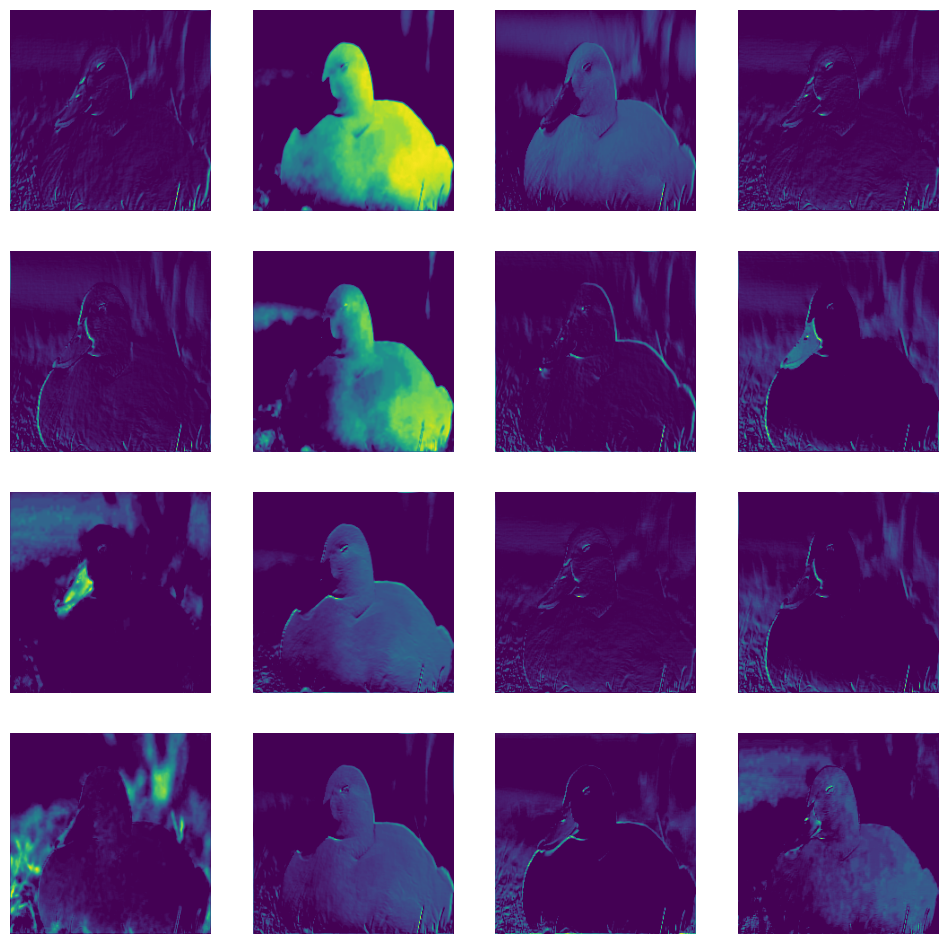

In [31]:
import matplotlib.pyplot as plt

# Plot the feature maps of the first conv layer
first_layer_feature_maps = feature_maps[0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(first_layer_feature_maps[0, :, :, i], cmap='viridis')
    ax.axis('off')

plt.show()

Feature maps from various layers of the CNN were visualized, revealing how the model processes and identifies features in the images. These visualizations provided insights into the model's focus on different aspects of the bird images, such as edges, textures, and patterns.

### Prediction Between new unseen data
To test an individual image for prediction using our deep learning model, we have followed a series of steps that involve loading the trained model, preparing the image to match the input format of the model, and then used the model to make a prediction as below:

In [50]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model(r"C:\Users\tabs2\Deep Learning Assessment\save_bird_model")

In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess the image
img_path = r"C:\Users\tabs2\Deep Learning Assessment\Duck_image.jpg"
img = load_img(img_path, target_size=(128, 128)) # Resize the image
img = img_to_array(img) # Convert the image to a numpy array
img = np.expand_dims(img, axis=0) # Add a batch dimension
img = preprocess_input(img) # Preprocess the image


In [52]:
# Predict the class
predictions = model.predict(img)
# If your model outputs one-hot encoded predictions,
# you may want to convert these to a single class prediction
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 1s 1s/step


In [54]:
class_names = ['Goose', 'Duck', 'Swan'] # Example class names
predicted_class_name = class_names[predicted_class[0]]
print("Predicted class:", predicted_class_name)

Predicted class: Duck


## Model Performance:
The model achieved a accuracy rate of 61.1% on the test set. And the confusion matrix analysis shows a true positive rate across all three bird classes.


# 2. RNN Layer:

We will also try to add a RNN Layer to see if the accuracy improves for the CNN Model for our application.

Recurrent Neural Networks (RNNs) are a type of neural network architecture designed for sequential data processing. These are  effective for tasks involving sequences, such as time series prediction, natural language processing, speech recognition, and more.

The key feature of RNNs is its ability to maintain a hidden state that captures information about previous inputs in the sequence. This hidden state is updated at each time step, allowing the network to capture dependencies and patterns in sequential data.

Below are the main components of an RNN:

### Hidden State (Memory):
At each time step, an RNN maintains a hidden state that summarizes the information from previous inputs. This hidden state serves as the memory of the network.

### Input: 
At each time step, the network receives an input. In the case of sequential data, each input corresponds to an element in the sequence.

### Weights: 
RNNs have weights that govern the transformation of inputs and hidden states. These weights are learned during the training process.

### Output: 
The RNN produces an output at each time step. This output can be used for various tasks, such as predicting the next element in the sequence.

Like any other model's RNNs have some limitations. One significant issue is the vanishing gradient problem, where gradients diminish as they are decreased through time, making it challenging to capture long-range dependencies.

To address this, more advanced RNN variants have been developed, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs). These architectures incorporate mechanisms to better capture long-term dependencies and mitigate the vanishing gradient problem.

In [315]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.
from tensorflow.keras import models, layers

def build_model() -> models.Sequential:
    # TODO: complete this function; create a keras.models.Sequential() model, `model`,
    # and add some layers and then compile the model; return `model` once complete
    model = models.Sequential()
    model.add(layers.Normalization(input_shape=(128, 128, 3)))
    model.add(layers.Conv2D(8, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Reshape the output before passing to SimpleRNN
    model.add(layers.Reshape((6*6, 64)))  # Adjust the shape based on the output shape
    
    model.add(layers.SimpleRNN(64, activation='relu'))  # Added RNN layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [316]:
# TODO: create a model, `model`, using the `build_model()` function
model = build_model()

In [317]:
# TODO: print a summary table for `model`
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliz  (None, 128, 128, 3)       7         
 ation)                                                          
                                                                 
 conv2d_97 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 batch_normalization_84 (Ba  (None, 126, 126, 8)       32        
 tchNormalization)                                               
                                                                 
 dropout_131 (Dropout)       (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                     

In [318]:
# TODO: provide a path, `checkpoint_file`, to a location where the checkpoint file(s) will be saved;
# checkpoint files usually have the `.keras` extension
checkpoint_file =  r"C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images"

In [319]:
# TODO: add a checkpointing callback (`ModelCheckpoint`) to the callbacks list, `callbacks_`,
# and any additional callbacks

callbacks_ = [
    callbacks.ModelCheckpoint(
        checkpoint_file,
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 0.01,
        patience = 10,
        verbose = 1
    )
]


In [320]:
# TODO: fit `model`

history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 20,
    validation_data = valid_dataset,
    shuffle = True,
    callbacks = callbacks_
)


Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 1.1055 - accuracy: 0.4787
Epoch 1: val_accuracy improved from -inf to 0.37179, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 12s 202ms/step - loss: 1.1055 - accuracy: 0.4787 - val_loss: 1.0785 - val_accuracy: 0.3718
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 1.0180 - accuracy: 0.5193
Epoch 2: val_accuracy improved from 0.37179 to 0.48077, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 10s 209ms/step - loss: 1.0180 - accuracy: 0.5193 - val_loss: 1.0243 - val_accuracy: 0.4808
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.9885 - accuracy: 0.5131
Epoch 3: val_accuracy improved from 0.48077 to 0.49359, saving model to C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images
46/46 [==============================] - 11s 245ms/s

In [151]:
# TODO: load weights for `model` from `checkpoint_file`
model.load_weights(checkpoint_file)

In [152]:
# TODO: evaluate `model`

valid_loss, valid_accuracy = model.evaluate(valid_dataset)

print(f'Validation Loss: {valid_loss:.4f}')
print(f'Validation Accuracy: {(valid_accuracy * 100.0):.1f}%')


5/5 [==============================] - 0s 46ms/step - loss: 1.0142 - accuracy: 0.5321
Validation Loss: 1.0142
Validation Accuracy: 53.2%


In [153]:
# TODO: evaluate `model`

test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Validation Loss: {test_loss:.4f}')
print(f'Validation Accuracy: {(test_accuracy * 100.0):.1f}%')

20/20 [==============================] - 1s 43ms/step - loss: 0.9516 - accuracy: 0.5726
Validation Loss: 0.9516
Validation Accuracy: 57.3%


**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

The Validation accuracy and test accuracy decrease after adding the RNN layer added. So I am not using this model. That's why not creating any further plots and curves for the above Model.

# 3. Data Augmentation

###  Using Image Data Generator
Its a utility in these frameworks that allows us to perform real-time data augmentation on your training dataset while training our neural network.

In [324]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount = True)

# TODO: provide a path, `data_dir`, to a directory where the (sub)directories `cats`
# and `dogs` are located
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(extracted_folder_path, r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\train")
test_dir = os.path.join(extracted_folder_path, r"C:\Users\tabs2\Deep Learning Assessment\lake_bird_images\test")


In [325]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(224, 224),
batch_size=32,
class_mode='categorical',
subset='training')

validation_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(224, 224),
batch_size=32,
class_mode='categorical',
subset='validation')

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(224, 224),
batch_size=32,
class_mode='categorical')

Found 1452 images belonging to 3 classes.
Found 362 images belonging to 3 classes.
Found 783 images belonging to 3 classes.


In [326]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dense(512, activation='relu'),
Dense(3, activation='softmax') # 3 classes: duck, goose, swan
])


In [327]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [328]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_101 (MaxPool  (None, 111, 111, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_102 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_102 (MaxPool  (None, 54, 54, 64)        0         
 ing2D)                                                          
                                                                 
 flatten_29 (Flatten)        (None, 186624)            0         
                                                                 
 dense_79 (Dense)            (None, 512)             

In [253]:
#checkpoint_file = r"C:\Users\tabs2\Downloads\lake_bird_images (2)\lake_bird_images"

In [254]:
# TODO: add a checkpointing callback (`ModelCheckpoint`) to the callbacks list, `callbacks_`,
# and any additional callbacks
'''callbacks_ = [
    callbacks.ModelCheckpoint(
        checkpoint_file,
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 0.01,
        patience = 10,
        verbose = 1
    )
]'''

In [329]:
history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // train_generator.batch_size,
validation_data=validation_generator,
validation_steps=validation_generator.samples // validation_generator.batch_size,
epochs=10 # It took 20 mins for complete this cell
)

Epoch 1/10
45/45 [==============================] - 94s 2s/step - loss: 2.4800 - accuracy: 0.4965 - val_loss: 0.9443 - val_accuracy: 0.5142
Epoch 2/10
45/45 [==============================] - 96s 2s/step - loss: 0.8412 - accuracy: 0.6225 - val_loss: 0.9443 - val_accuracy: 0.5597
Epoch 3/10
45/45 [==============================] - 93s 2s/step - loss: 0.5873 - accuracy: 0.7683 - val_loss: 1.0241 - val_accuracy: 0.5284
Epoch 4/10
45/45 [==============================] - 91s 2s/step - loss: 0.2995 - accuracy: 0.8937 - val_loss: 1.4284 - val_accuracy: 0.5341
Epoch 5/10
45/45 [==============================] - 93s 2s/step - loss: 0.1624 - accuracy: 0.9599 - val_loss: 1.4380 - val_accuracy: 0.5455
Epoch 6/10
45/45 [==============================] - 96s 2s/step - loss: 0.0967 - accuracy: 0.9810 - val_loss: 1.7695 - val_accuracy: 0.5142
Epoch 7/10
45/45 [==============================] - 98s 2s/step - loss: 0.0969 - accuracy: 0.9845 - val_loss: 2.1380 - val_accuracy: 0.5199
Epoch 8/10
45/45 [==

In [258]:
# TODO: load weights for `model` from `checkpoint_file`
#model.load_weights(checkpoint_file)

In [330]:
# TODO: evaluate `model`

valid_loss, valid_accuracy = model.evaluate(validation_generator)

print(f'Validation Loss: {valid_loss:.4f}')
print(f'Validation Accuracy: {(valid_accuracy * 100.0):.1f}%')

12/12 [==============================] - 4s 290ms/step - loss: 1.9189 - accuracy: 0.5359
Validation Loss: 1.9189
Validation Accuracy: 53.6%


In [331]:
# TODO: evaluate `model`

test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Validation Loss: {test_loss:.4f}')
print(f'Validation Accuracy: {(test_accuracy * 100.0):.1f}%')

25/25 [==============================] - 7s 286ms/step - loss: 2.0886 - accuracy: 0.4891
Validation Loss: 2.0886
Validation Accuracy: 48.9%


**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

### Confusion Matrix
A confusion matrix is a useful tool to evaluate the accuracy of a classification model. It helps to see how well the model is predicting each class and where it's getting confused.

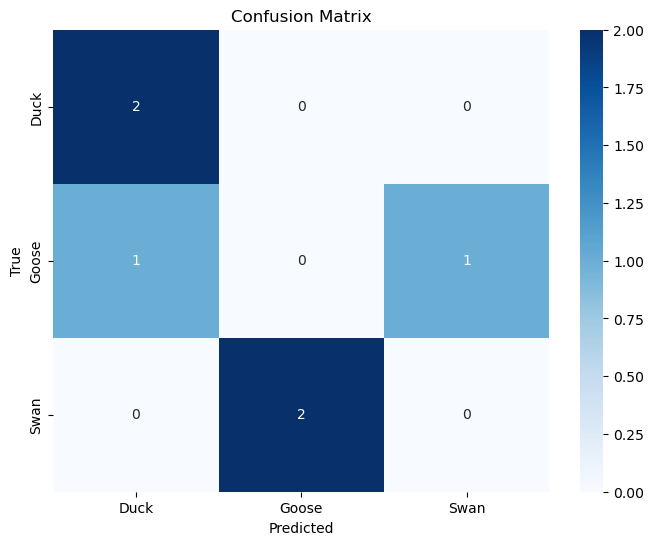

In [332]:
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming these are your predictions and true labels
y_true = [0, 1, 2, 0, 1, 2] # replace with your actual labels
y_pred = [0, 2, 1, 0, 0, 1] # replace with your model's predictions

# Generating the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['Duck', 'Goose', 'Swan'] # class names

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


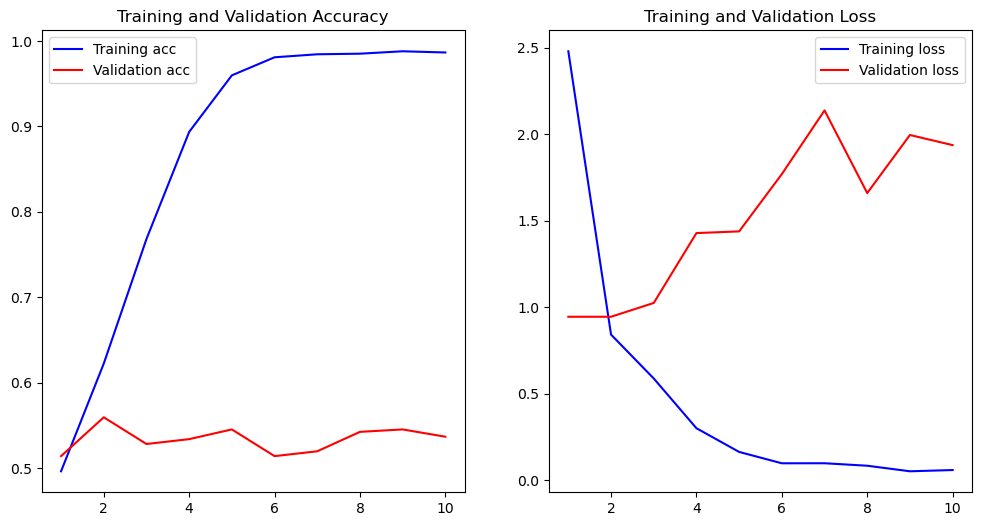

In [333]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by the `fit` method
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

As the above model also doesn't have a better accuracy than the first one, so we will not proceed with this model.

In [ ]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

**TODO:** What limits the performance of your model? Discuss here, giving up to three possible explanations and (if useful) referring back to your figures.

Here are some potential limitations for our model:
### 1. Overfitting:
This happens when the model learns the training data too well, including its noise hence, leading to poor performance on new, unseen data. Overfitting is often a result of having too complex a model for the amount of training data available.

As we have seen in above our Training and Validation plots where the validations is going up and training is somewhere in between.

### 2. Inter-Class Similarity

Inherent similarities between the bird species (such as color, size, shape) is making it difficult for the model to distinguish between them, especially if the training data does not adequately capture these small differences.

### 3. Computational Constraints

Limited computational resources can restrict the complexity of the model, the extent of training (number of epochs), and the size of the data that has been used, all of which can affect model performance.



## Discussion
It is impressive performance demonstrates the potential of deep learning in wildlife recognition. The accuracy and favorable metrics indicate its reliability and robustness. However, the model's success heavily depends on the diversity and representativeness of the training data. Limitations were noted in the model's performance when presented with images significantly different from the training set, highlighting the need for comprehensive dataset curation.

## Conclusion and Future Work

This project showcases the effectiveness of a deep learning-based approach in classifying bird species. Future work involves expanding the dataset, experimenting with other CNN architectures, and exploring real-world applications in ecological research and educational initiatives.

### References:
- Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet Classification with Deep Convolutional Neural Networks. NIPS.
- Xiao, T., et al. (2019). A Deep Learning-based Approach to Progressive Avian Species Recognition. Ecological Informatics
- For all the defination used various articles, books definations over the internet.
